In [45]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
df = pd.read_csv("creditcard.csv")

In [47]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [50]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [51]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [52]:
from sklearn.decomposition import PCA

In [53]:
crct = df[df.Class == 0]
wrng = df[df.Class == 1]

In [54]:
crct.shape

(284315, 31)

In [55]:
wrng.shape

(492, 31)

In [56]:
crct.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [57]:
wrng.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [58]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [59]:
crct_sample = crct.sample(n=492)

In [60]:
new_dataset = pd.concat([crct_sample, wrng], axis = 0)

In [61]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
159884,113020.0,2.119299,-0.143897,-1.761082,0.029529,0.449121,-0.480476,0.052156,-0.154922,0.984516,...,0.211493,0.707355,-0.048619,0.014669,0.385905,-0.402865,-0.002215,-0.056997,1.00,0
119669,75538.0,-1.102814,0.839941,1.436846,2.058423,1.272508,0.849999,0.246985,0.080273,-0.551463,...,-0.238242,-0.264259,-0.350094,-1.344271,-0.207343,0.076353,0.284676,0.029829,30.43,0
192884,129895.0,-0.771132,0.620634,1.347403,0.142970,1.333892,0.816884,0.487323,0.350024,-0.381405,...,0.225612,0.810291,-0.169809,-0.963535,-0.065282,-0.565053,0.199276,0.135750,2.00,0
98598,66723.0,-0.219955,1.584288,1.066231,3.093137,0.368451,-0.686030,1.025422,-0.203238,-1.821909,...,0.063274,0.171953,-0.027265,0.637189,-0.393718,0.144729,0.154854,0.190952,37.27,0
117280,74613.0,-0.165473,0.629579,1.680624,0.231619,-0.425901,-0.152693,0.220433,0.056705,-0.372860,...,0.015433,0.093758,0.055793,0.131200,-0.809823,1.120042,0.097760,0.133553,23.00,0


In [62]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [63]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [64]:
pca = PCA(n_components=8)

In [65]:
pca.fit(new_dataset)

PCA(n_components=8)

In [66]:
x_pca = pca.transform(new_dataset)

In [67]:
new_dataset.shape

(984, 31)

In [68]:
x_pca.shape

(984, 8)

In [69]:
x_pca.groupby('Class').mean()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [87]:
#x = x_pca.drop(columns = 'Class', axis =1)
y = x_pca['Class']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [88]:
y = new_dataset.iloc[:, df.columns == 'Class']

In [89]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
159884,113020.0,2.119299,-0.143897,-1.761082,0.029529,0.449121,-0.480476,0.052156,-0.154922,0.984516,...,0.211493,0.707355,-0.048619,0.014669,0.385905,-0.402865,-0.002215,-0.056997,1.00,0
119669,75538.0,-1.102814,0.839941,1.436846,2.058423,1.272508,0.849999,0.246985,0.080273,-0.551463,...,-0.238242,-0.264259,-0.350094,-1.344271,-0.207343,0.076353,0.284676,0.029829,30.43,0
192884,129895.0,-0.771132,0.620634,1.347403,0.142970,1.333892,0.816884,0.487323,0.350024,-0.381405,...,0.225612,0.810291,-0.169809,-0.963535,-0.065282,-0.565053,0.199276,0.135750,2.00,0
98598,66723.0,-0.219955,1.584288,1.066231,3.093137,0.368451,-0.686030,1.025422,-0.203238,-1.821909,...,0.063274,0.171953,-0.027265,0.637189,-0.393718,0.144729,0.154854,0.190952,37.27,0
117280,74613.0,-0.165473,0.629579,1.680624,0.231619,-0.425901,-0.152693,0.220433,0.056705,-0.372860,...,0.015433,0.093758,0.055793,0.131200,-0.809823,1.120042,0.097760,0.133553,23.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [90]:
x_pca

array([[-2.40219390e+04, -9.64741827e+01, -7.59791440e+00, ...,
        -1.25825459e+00,  2.26291473e-01, -1.09472146e+00],
       [ 1.34600631e+04, -6.98854916e+01, -1.05616005e+01, ...,
        -9.28228182e-01,  2.29974722e-01,  1.26111069e+00],
       [-4.08969388e+04, -9.41967008e+01, -6.33578923e+00, ...,
        -1.76870314e+00, -1.91582307e-02,  5.87062612e-01],
       ...,
       [-8.03529321e+04, -1.53201803e+01,  5.26504470e+00, ...,
        -2.07576485e+00, -2.53013554e-01, -7.82206936e-01],
       [-8.09679191e+04,  1.51834857e+02,  9.71823544e+00, ...,
         1.08089052e+00, -3.97023787e-01,  1.22727537e+00],
       [-8.13499355e+04, -5.06051960e+01, -2.52326048e+00, ...,
         1.66917963e+00, -1.01681515e-01, -1.07105433e+00]])

In [91]:
y

,Class
159884,0
119669,0
192884,0
98598,0
117280,0
...,...
279863,1
280143,1
280149,1
281144,1


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size = 3 , stratify=y ,random_state=2)

In [94]:
 print(x_pca.shape,x_train.shape,x_test.shape)

(984, 8) (981, 8) (3, 8)


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
random_forest = RandomForestClassifier(n_estimators=100)

In [97]:
random_forest.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [98]:
y_pred = random_forest.predict(x_test)

In [99]:
random_forest.score(x_test,y_test)

1.0

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [102]:
model = LogisticRegression()

In [103]:
model.fit(x_train,y_train)

C:\Users\tarak\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\tarak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
pred = model.predict(x_train)
acc = accuracy_score(pred, y_train)

In [105]:
print(acc)

0.9194699286442406


In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       557
           1       0.85      0.99      0.91       424

    accuracy                           0.92       981
   macro avg       0.92      0.93      0.92       981
weighted avg       0.93      0.92      0.92       981



In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [110]:
y_pred = decision_tree.predict(x_train)

In [111]:
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       491

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



In [112]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

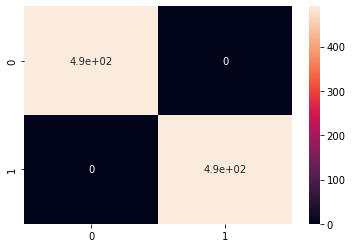

In [113]:
confusion_matrix_2 = confusion_matrix(y_pred,y_train)
sns.heatmap(confusion_matrix_2, annot = True)
plt.show()

In [116]:
decision_tree.score(x_train,y_train)

1.0